In [34]:
import os
import tensorflow as tf
import numpy as np
import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import glorot_uniform
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random


In [35]:
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

In [ ]:
directory = os.getcwd()
filename = 'best_SMDD_weights.h5'
filepath = os.path.join(directory, filename)


In [2]:
stimulus = np.load('/Users/iuliarusu/Documents/Sharpee/ProcAiryData/inpfull_op50_SF.npz')
Y_full = np.load('/Users/iuliarusu/Documents/Sharpee/ProcAiryData/Yfull_op50_SF.npz')

In [3]:
stimulus_concat = np.concatenate([stimulus['arr_0'], stimulus['arr_1'], stimulus['arr_2'], stimulus['arr_3'], stimulus['arr_4'], stimulus['arr_5'], stimulus['arr_6']], axis =1)

In [4]:
stimulus_concat = stimulus_concat.T

In [5]:
#import AVA data from all cells
SMDD_0_df = pd.read_csv ('/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/SMDD_0_df.csv')
SMDD_1_df = pd.read_csv('/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/SMDD_1_df.csv') 
SMDD_2_df = pd.read_csv('/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/SMDD_2_df.csv')
SMDD_3_df = pd.read_csv('/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/SMDD_3_df.csv') 
SMDD_4_df = pd.read_csv('/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/SMDD_4_df.csv') 
SMDD_5_df = pd.read_csv('/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/SMDD_5_df.csv') 
SMDD_6_df = pd.read_csv('/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/SMDD_6_df.csv')

In [6]:
SMDD_0 = np.array(SMDD_0_df.iloc[:, 1: -2])
SMDD_1 = np.array(SMDD_1_df.iloc[:, 1: -3])
SMDD_2 = np.array(SMDD_2_df.iloc[:, 1: -3])
SMDD_3 = np.array(SMDD_3_df.iloc[:, 1: -3])
SMDD_4 = np.array(SMDD_4_df.iloc[:, 1: -3])
SMDD_5 = np.array(SMDD_5_df.iloc[:, 1: -3])
SMDD_6 = np.array(SMDD_6_df.iloc[:, 1: -3])

In [7]:
SMDD_all = np.concatenate([SMDD_0, SMDD_1, SMDD_2, SMDD_3, SMDD_4, SMDD_5, SMDD_6], axis = 0)

In [8]:
SMDD_all.shape

(12, 1600)

In [9]:
#seperate stim 1 and stim 0, 
SMDD_stim_0 = np.concatenate([SMDD_0, SMDD_1, SMDD_6], axis = 0)
SMDD_stim_1 = np.concatenate([SMDD_2, SMDD_3, SMDD_4, SMDD_5], axis = 0)




In [10]:
def get_bins_avg(stimulus, response, bin_size, start_idx, cell_idx, num_bins=10, nsamples=10):
    response_vector = []
    stimulus_vector = []
    for _ in range(nsamples):
        r = response[cell_idx, start_idx: start_idx + bin_size]
        response_vector.append(np.average(r))
        print('response', response_vector)

        bin_stimuli = []
        for i in range(num_bins):
           
            end_idx = (start_idx ) - (i * bin_size)
            print('start_idx', start_idx)
            print('end', end_idx)
            start_idx_bin = end_idx + bin_size
            print('start_idx_bin', start_idx_bin)

            # Check if the calculated index is within the bounds
            if start_idx_bin < 0:
                break

            # Append the average of stimulus over the bin
            bin_stimuli.append(np.average(stimulus[0, end_idx:start_idx_bin]))
            print('stim', stimulus[0, start_idx_bin:end_idx])
            print('bin_stimuli', bin_stimuli)

        # Collect all averages per sample
        stimulus_vector.append(bin_stimuli)
        print('stimulus_vector', stimulus_vector)

        # Update start index for the next sample
        start_idx += bin_size

    # Convert list of lists into a 2D NumPy array
    stimulus_matrix = np.array(stimulus_vector)  # Transpose to match expected dimensions

    return stimulus_matrix, np.array(response_vector)

In [11]:
stim_0 = stimulus_concat[0, :].reshape(1600, 1)
stim_1 = stimulus_concat[2, :].reshape(1600, 1)

In [12]:
all_data_stim0 = []
all_labels_stim0 = []

bin_size = 6
start_idx = 200  # Starting index for the stimulus and response extraction
num_bins = 6
nsamples = 50 #amount of times you're moving over the data

stimulus = stim_0.T
response = SMDD_stim_0
cell_idx = 0 #cell in response
# Calculate data and labels for each cell or half the cells
num_cells = response.shape[0]  # or response.shape[0] // 2 for half of the cells
for cell_idx in range(num_cells):
    data, label = get_bins_avg(stimulus, response, bin_size, start_idx, cell_idx, num_bins, nsamples)
    all_data_stim0.append(data)
    all_labels_stim0.append(label)

response [0.07755354303096408]
start_idx 200
end 200
start_idx_bin 206
stim []
bin_stimuli [0.0]
start_idx 200
end 194
start_idx_bin 200
stim []
bin_stimuli [0.0, 1.0]
start_idx 200
end 188
start_idx_bin 194
stim []
bin_stimuli [0.0, 1.0, 1.0]
start_idx 200
end 182
start_idx_bin 188
stim []
bin_stimuli [0.0, 1.0, 1.0, 1.0]
start_idx 200
end 176
start_idx_bin 182
stim []
bin_stimuli [0.0, 1.0, 1.0, 1.0, 1.0]
start_idx 200
end 170
start_idx_bin 176
stim []
bin_stimuli [0.0, 1.0, 1.0, 1.0, 1.0, 1.0]
stimulus_vector [[0.0, 1.0, 1.0, 1.0, 1.0, 1.0]]
response [0.07755354303096408, 0.06289434957807366]
start_idx 206
end 206
start_idx_bin 212
stim []
bin_stimuli [0.0]
start_idx 206
end 200
start_idx_bin 206
stim []
bin_stimuli [0.0, 0.0]
start_idx 206
end 194
start_idx_bin 200
stim []
bin_stimuli [0.0, 0.0, 1.0]
start_idx 206
end 188
start_idx_bin 194
stim []
bin_stimuli [0.0, 0.0, 1.0, 1.0]
start_idx 206
end 182
start_idx_bin 188
stim []
bin_stimuli [0.0, 0.0, 1.0, 1.0, 1.0]
start_idx 206
end

In [13]:
all_data__stim0_array = np.concatenate(all_data_stim0, axis=0)

# Convert list of 1D arrays to a single 2D array (if all_labels consists of 1D arrays)
all_labels__stim0_array = np.concatenate(all_labels_stim0, axis=0)

In [14]:
all_data_stim1 = []
all_labels_stim1 = []

bin_size = 6
start_idx = 200  # Starting index for the stimulus and response extraction
num_bins = 6
nsamples = 100 #amount of times you're moving over the data

stimulus = stim_1.T
response = SMDD_stim_1
cell_idx = 0 #cell in response
# Calculate data and labels for each cell or half the cells
num_cells = response.shape[0]  # or response.shape[0] // 2 for half of the cells
for cell_idx in range(num_cells):
    data, label = get_bins_avg(stimulus, response, bin_size, start_idx, cell_idx, num_bins, nsamples)
    all_data_stim1.append(data)
    all_labels_stim1.append(label)

response [0.030591798587358915]
start_idx 200
end 200
start_idx_bin 206
stim []
bin_stimuli [0.0]
start_idx 200
end 194
start_idx_bin 200
stim []
bin_stimuli [0.0, 1.0]
start_idx 200
end 188
start_idx_bin 194
stim []
bin_stimuli [0.0, 1.0, 1.0]
start_idx 200
end 182
start_idx_bin 188
stim []
bin_stimuli [0.0, 1.0, 1.0, 1.0]
start_idx 200
end 176
start_idx_bin 182
stim []
bin_stimuli [0.0, 1.0, 1.0, 1.0, 0.3333333333333333]
start_idx 200
end 170
start_idx_bin 176
stim []
bin_stimuli [0.0, 1.0, 1.0, 1.0, 0.3333333333333333, 0.0]
stimulus_vector [[0.0, 1.0, 1.0, 1.0, 0.3333333333333333, 0.0]]
response [0.030591798587358915, 0.03641457058566429]
start_idx 206
end 206
start_idx_bin 212
stim []
bin_stimuli [0.0]
start_idx 206
end 200
start_idx_bin 206
stim []
bin_stimuli [0.0, 0.0]
start_idx 206
end 194
start_idx_bin 200
stim []
bin_stimuli [0.0, 0.0, 1.0]
start_idx 206
end 188
start_idx_bin 194
stim []
bin_stimuli [0.0, 0.0, 1.0, 1.0]
start_idx 206
end 182
start_idx_bin 188
stim []
bin_stim

In [15]:
all_data__stim1_array = np.concatenate(all_data_stim1, axis=0)

# Convert list of 1D arrays to a single 2D array (if all_labels consists of 1D arrays)
all_labels__stim1_array = np.concatenate(all_labels_stim1, axis=0)

In [16]:
all_data__stim1_array.shape

(700, 6)

In [17]:
#concatenate both stimuli
all_data_array = np.concatenate([all_data__stim0_array, all_data__stim1_array], axis = 0)
all_labels_array = np.concatenate([all_labels__stim0_array, all_labels__stim1_array], axis = 0) 

In [18]:
S, Y = all_data_array, all_labels_array 

 

In [19]:
D = 6

In [37]:
def make_linear_model(D, optimizer, seed= None):
    input_layer = Input((D,))
    linear_layer = Dense(1, kernel_initializer=glorot_uniform(seed=seed))(input_layer)
    output_layer = Activation('sigmoid')(linear_layer)
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=optimizer, loss='binary_crossentropy')
    return model

In [56]:


def run_jackknife_models(S, Y):

    patience = 3 # early stopping
    epochs = 1000 # max number of cycles to train
    all_best_weights = []

    sq1, sq2, sq3, sq4 = np.array_split(S, 4)
    yq1, yq2, yq3, yq4 = np.array_split(Y, 4)

    j1 = {
    'S_train': np.concatenate((sq2, sq3, sq4), axis=0),
    'S_valid': sq1,
    'Y_train': np.concatenate((yq2, yq3, yq4), axis=0),
    'Y_valid': yq1
}
    j2 = {
    'S_train': np.concatenate((sq1, sq3, sq4), axis=0),
    'S_valid': sq2,
    'Y_train': np.concatenate((yq1, yq3, yq4), axis=0),
    'Y_valid': yq2
}
    j3 = {
    'S_train': np.concatenate((sq1, sq2, sq4), axis=0),
    'S_valid': sq3,
    'Y_train': np.concatenate((yq1, yq2, yq4), axis=0),
    'Y_valid': yq3
}
    j4 = {
    'S_train': np.concatenate((sq1, sq2, sq3), axis=0),
    'S_valid': sq4,
    'Y_train': np.concatenate((yq1, yq2, yq3), axis=0),
    'Y_valid': yq4
}

    jackknives = [j1, j2, j3, j4]

    for i, jackknife in enumerate(jackknives):
        S_train = jackknife['S_train']
        S_valid = jackknife['S_valid']
        Y_train = jackknife['Y_train']
        Y_valid = jackknife['Y_valid']

 
        adam_optimizer = Adam(learning_rate=0.001)
        best_weights = []
        
    # Creating the model with the optimizer passed as an argument
        model = make_linear_model(S_train.shape[1], adam_optimizer, seed = 42)

    # Setting up callbacks
        filepath = f'jackknives_h5/best_lin_SMDD_weights_{i}.weights.h5' 
        callbacks = [
                EarlyStopping(patience=patience, min_delta=1e-5, monitor='val_loss', verbose=1),
                ModelCheckpoint(filepath=filepath, save_weights_only=True, save_best_only=True, verbose=1)
        ]

    # Training the model
        H = model.fit(S_train, Y_train, epochs=epochs, callbacks=callbacks, validation_data=(S_valid, Y_valid), verbose=2)
        print(model.summary())
        model.load_weights(filepath)#loads the best weights from the training
        best_weights.append(model.get_weights()) #retreives best weights from load_weights callback
    
        all_best_weights.append(best_weights)

    return all_best_weights

In [ ]:
def run_models(S, Y, num_models=4, global_seed = 24):
    np.random.seed(global_seed)
    test_size = 0.25
    patience = 3
    epochs = 1000
    all_best_weights = []
    
    
    
    
    for i in range(num_models):
        seed = np.random.randint(0, 1000)  # Random seed for each iteration
        adam_optimizer = Adam(learning_rate=0.001)
        best_weights = []
        # Splitting the dataset
        S_train, S_valid, Y_train, Y_valid = train_test_split(S, Y, test_size=test_size, random_state=seed)

    # Creating the model with the optimizer passed as an argument
        model = make_linear_model(S_train.shape[1], adam_optimizer)

    # Setting up callbacks
        filepath = f'best_weights_SMDD{i}.weights.h5' 
        callbacks = [
                EarlyStopping(patience=patience, min_delta=1e-5, monitor='val_loss', verbose=1),
                ModelCheckpoint(filepath=filepath, save_weights_only=True, save_best_only=True, verbose=1)
        ]

    # Training the model
        H = model.fit(S_train, Y_train, epochs=epochs, callbacks=callbacks, validation_data=(S_valid, Y_valid), verbose=2)
        print(model.summary())
        model.load_weights(filepath)#loads the best weights from the training
        best_weights.append(model.get_weights()) #retreives best weights from load_weights callback
    
        all_best_weights.append(best_weights)

    return all_best_weights

In [57]:
all_best_weights = run_jackknife_models(S, Y)

Epoch 1/1000

Epoch 1: val_loss improved from inf to 0.64531, saving model to jackknives_h5/best_lin_SMDD_weights_0.weights.h5
23/23 - 1s - 36ms/step - loss: 0.5865 - val_loss: 0.6453
Epoch 2/1000

Epoch 2: val_loss improved from 0.64531 to 0.63983, saving model to jackknives_h5/best_lin_SMDD_weights_0.weights.h5
23/23 - 0s - 8ms/step - loss: 0.5786 - val_loss: 0.6398
Epoch 3/1000

Epoch 3: val_loss improved from 0.63983 to 0.63507, saving model to jackknives_h5/best_lin_SMDD_weights_0.weights.h5
23/23 - 0s - 7ms/step - loss: 0.5719 - val_loss: 0.6351
Epoch 4/1000

Epoch 4: val_loss improved from 0.63507 to 0.63091, saving model to jackknives_h5/best_lin_SMDD_weights_0.weights.h5
23/23 - 0s - 7ms/step - loss: 0.5664 - val_loss: 0.6309
Epoch 5/1000

Epoch 5: val_loss improved from 0.63091 to 0.62724, saving model to jackknives_h5/best_lin_SMDD_weights_0.weights.h5
23/23 - 0s - 7ms/step - loss: 0.5617 - val_loss: 0.6272
Epoch 6/1000

Epoch 6: val_loss improved from 0.62724 to 0.62397, sa

Model: "functional_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_16 (InputLayer)     │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │             7 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_16 (Activation)      │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23 (96.00 B)

 Trainable params: 7 (28.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 16 (68.00 B)

None
Epoch 1/1000

Epoch 1: val_loss improved from inf to 0.53690, saving model to jackknives_h5/best_lin_SMDD_weights_1.weights.h5
23/23 - 1s - 36ms/step - loss: 0.6224 - val_loss: 0.5369
Epoch 2/1000

Epoch 2: val_loss improved from 0.53690 to 0.52725, saving model to jackknives_h5/best_lin_SMDD_weights_1.weights.h5
23/23 - 0s - 8ms/step - loss: 0.6170 - val_loss: 0.5272
Epoch 3/1000

Epoch 3: val_loss improved from 0.52725 to 0.51892, saving model to jackknives_h5/best_lin_SMDD_weights_1.weights.h5
23/23 - 0s - 7ms/step - loss: 0.6122 - val_loss: 0.5189
Epoch 4/1000

Epoch 4: val_loss improved from 0.51892 to 0.51174, saving model to jackknives_h5/best_lin_SMDD_weights_1.weights.h5
23/23 - 0s - 7ms/step - loss: 0.6082 - val_loss: 0.5117
Epoch 5/1000

Epoch 5: val_loss improved from 0.51174 to 0.50551, saving model to jackknives_h5/best_lin_SMDD_weights_1.weights.h5
23/23 - 0s - 7ms/step - loss: 0.6046 - val_loss: 0.5055
Epoch 6/1000

Epoch 6: val_loss improved from 0.50551 to 0.5000

Model: "functional_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_17 (InputLayer)     │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │             7 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_17 (Activation)      │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23 (96.00 B)

 Trainable params: 7 (28.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 16 (68.00 B)

None
Epoch 1/1000

Epoch 1: val_loss improved from inf to 0.62678, saving model to jackknives_h5/best_lin_SMDD_weights_2.weights.h5
23/23 - 1s - 36ms/step - loss: 0.5928 - val_loss: 0.6268
Epoch 2/1000

Epoch 2: val_loss improved from 0.62678 to 0.62341, saving model to jackknives_h5/best_lin_SMDD_weights_2.weights.h5
23/23 - 0s - 8ms/step - loss: 0.5840 - val_loss: 0.6234
Epoch 3/1000

Epoch 3: val_loss improved from 0.62341 to 0.62095, saving model to jackknives_h5/best_lin_SMDD_weights_2.weights.h5
23/23 - 0s - 8ms/step - loss: 0.5763 - val_loss: 0.6209
Epoch 4/1000

Epoch 4: val_loss improved from 0.62095 to 0.61921, saving model to jackknives_h5/best_lin_SMDD_weights_2.weights.h5
23/23 - 0s - 7ms/step - loss: 0.5697 - val_loss: 0.6192
Epoch 5/1000

Epoch 5: val_loss improved from 0.61921 to 0.61804, saving model to jackknives_h5/best_lin_SMDD_weights_2.weights.h5
23/23 - 0s - 7ms/step - loss: 0.5640 - val_loss: 0.6180
Epoch 6/1000

Epoch 6: val_loss improved from 0.61804 to 0.6172

Model: "functional_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_18 (InputLayer)     │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             7 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_18 (Activation)      │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23 (96.00 B)

 Trainable params: 7 (28.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 16 (68.00 B)

None
Epoch 1/1000

Epoch 1: val_loss improved from inf to 0.58421, saving model to jackknives_h5/best_lin_SMDD_weights_3.weights.h5
23/23 - 1s - 40ms/step - loss: 0.6064 - val_loss: 0.5842
Epoch 2/1000

Epoch 2: val_loss improved from 0.58421 to 0.57711, saving model to jackknives_h5/best_lin_SMDD_weights_3.weights.h5
23/23 - 0s - 8ms/step - loss: 0.5994 - val_loss: 0.5771
Epoch 3/1000

Epoch 3: val_loss improved from 0.57711 to 0.57108, saving model to jackknives_h5/best_lin_SMDD_weights_3.weights.h5
23/23 - 0s - 8ms/step - loss: 0.5934 - val_loss: 0.5711
Epoch 4/1000

Epoch 4: val_loss improved from 0.57108 to 0.56595, saving model to jackknives_h5/best_lin_SMDD_weights_3.weights.h5
23/23 - 0s - 7ms/step - loss: 0.5883 - val_loss: 0.5660
Epoch 5/1000

Epoch 5: val_loss improved from 0.56595 to 0.56155, saving model to jackknives_h5/best_lin_SMDD_weights_3.weights.h5
23/23 - 0s - 7ms/step - loss: 0.5839 - val_loss: 0.5615
Epoch 6/1000

Epoch 6: val_loss improved from 0.56155 to 0.5577

Model: "functional_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_19 (InputLayer)     │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │             7 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_19 (Activation)      │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23 (96.00 B)

 Trainable params: 7 (28.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 16 (68.00 B)

None


In [53]:
SMDD_weights = np.concatenate([
    all_best_weights[0][0][0],
    all_best_weights[1][0][0],
    all_best_weights[2][0][0],
    all_best_weights[3][0][0]
], axis=1)



In [55]:
SMDD_weights

array([[ 0.03377994, -0.07806163, -0.07610971, -0.02058651],
       [-0.4455513 ,  0.09966867, -0.12429406, -0.31475228],
       [-0.03333177, -0.05251097, -0.5964001 ,  0.27686217],
       [-0.13984366, -0.18098795, -0.00709746, -0.2514013 ],
       [ 0.05003282, -0.1259662 ,  0.04782785, -0.3338692 ],
       [-0.58025175, -0.08239932, -0.15921491, -0.11828742]],
      dtype=float32)

In [50]:
mean_SMDD = np.average(SMDD_weights, axis =1)

In [51]:
mean_SMDD

array([ 0.14230543, -0.46020117,  0.17496388, -0.5077245 , -0.02220705,
       -0.17761737], dtype=float32)

In [27]:
SMDD_weights_df = pd.DataFrame(SMDD_weights)
SMDD_weights_df.columns = ['Jackknife 1', 'Jackknife 2', 'Jackknife 3', 'Jackknife 4']

In [28]:
SMDD_weights_df['Average'] = mean_SMDD

In [29]:
SMDD_weights_df

,Jackknife 1,Jackknife 2,Jackknife 3,Jackknife 4,Average
0,0.051608,0.177420,-0.117795,0.047689,0.039731
1,-0.184387,-0.163378,-0.236188,-0.027428,-0.152845
2,-0.538306,-0.040642,-0.127995,-0.325205,-0.258037
3,0.516454,-0.144676,-0.240672,-0.135850,-0.001186
4,-0.801803,0.041205,-0.202781,0.031548,-0.232958
5,-0.061765,-0.248306,-0.198471,-0.343516,-0.213015


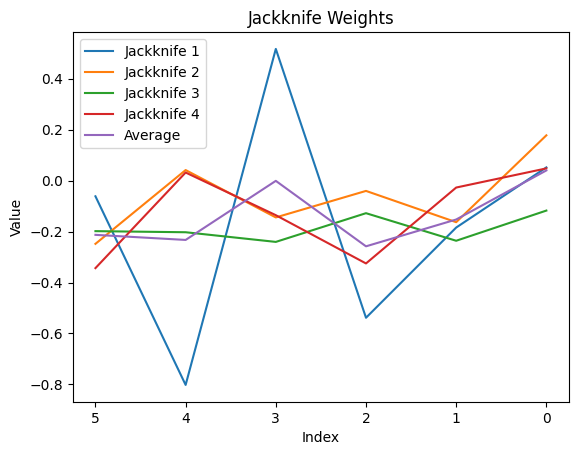

In [30]:
for column in SMDD_weights_df.columns:
    plt.plot(SMDD_weights_df.index, SMDD_weights_df[column], label=column)

# Adding title and labels
plt.title('Jackknife Weights')
plt.xlabel('Index')
plt.ylabel('Value')
plt.gca().invert_xaxis()

# Adding a legend
plt.legend()

# Showing the plot
plt.show()

In [31]:
std_dev = SMDD_weights_df[['Jackknife 1', 'Jackknife 2', 'Jackknife 3', 'Jackknife 4']].std(axis=1)


In [32]:
sem = std_dev / np.sqrt(4)

/var/folders/4x/v6r504vx43l3xd43p7kmbr400000gn/T/ipykernel_57846/1770871266.py:2: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(x=SMDD_weights_df.index, y=mean_SMDD, yerr=sem, fmt='-o', label='Average with SEM', ecolor='red', capsize=5, linestyle='-', marker='o', color='blue')
/var/folders/4x/v6r504vx43l3xd43p7kmbr400000gn/T/ipykernel_57846/1770871266.py:2: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(x=SMDD_weights_df.index, y=mean_SMDD, yerr=sem, fmt='-o', label='Average with SEM', ecolor='red', capsize=5, linestyle='-', marker='o', color='blue')


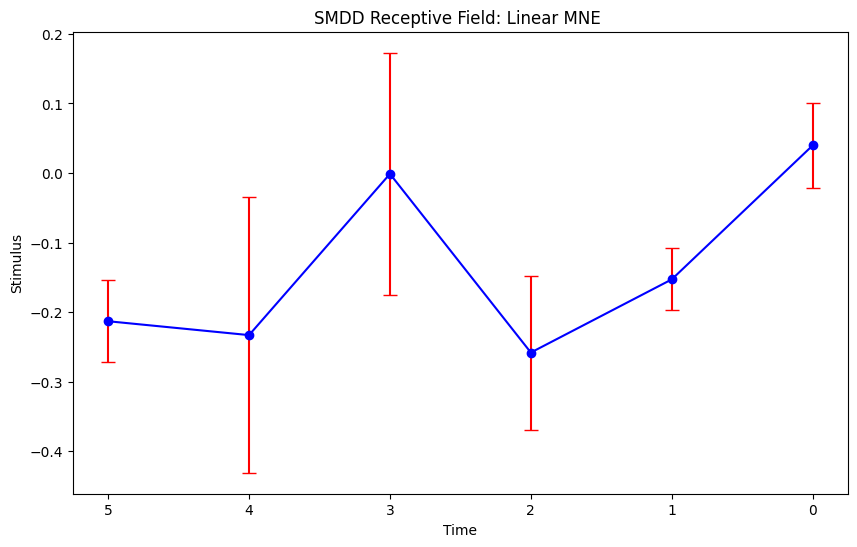

In [33]:
plt.figure(figsize=(10, 6))
plt.errorbar(x=SMDD_weights_df.index, y=mean_SMDD, yerr=sem, fmt='-o', label='Average with SEM', ecolor='red', capsize=5, linestyle='-', marker='o', color='blue')
plt.title('SMDD Receptive Field: Linear MNE ')
plt.xlabel('Time')
plt.ylabel('Stimulus')
plt.gca().invert_xaxis()

plt.show()

In [44]:
#calculate variance of weights 
def calculate_dots(w,s):
    dots = []
    for i in range(s.shape[0]):
        dot = np.dot(w, s[i])
        dots.append(dot)
    return dots

In [46]:
var = calculate_dots(w = mean_SMDD, s= S)

In [47]:
np.var(var)

0.13433733277472196

In [48]:
mean = np.mean(var)
mean

-0.5201626996617568

In [49]:
std = np.std(var)
std

0.36652057619555545